In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# define training settings
NUM_EPOCHS = 150
BATCH_SIZE = 128
MULTIPLIER = 1.0

In [3]:
import torch

CUDA_DEVICE = 3

torch.cuda.set_device(CUDA_DEVICE)
device = torch.device(f"cuda:{CUDA_DEVICE}" if torch.cuda.is_available() else "cpu")

In [4]:
from doren_bnn.mobilenet import MobileNet, NetType
from torchinfo import summary

NETTYPE = NetType.XNORPP_STTN
model = MobileNet(3, num_classes=10, nettype=NETTYPE).to(device)

summary(model, input_size=(BATCH_SIZE, 3, 32, 32))

Layer (type:depth-idx)                             Output Shape              Param #
MobileNet                                          [128, 10]                 --
├─Upsample: 1-1                                    [128, 3, 224, 224]        --
├─Sequential: 1-2                                  [128, 1024, 1, 1]         --
│    └─MobileNet_ConvBlock: 2-1                    [128, 32, 112, 112]       --
│    │    └─Sequential: 3-1                        [128, 32, 112, 112]       1,734
│    └─MobileNet_ConvDsBlock: 2-2                  [128, 64, 112, 112]       --
│    │    └─Sequential: 3-2                        [128, 64, 112, 112]       4,800
│    └─MobileNet_ConvDsBlock: 2-3                  [128, 128, 56, 56]        --
│    │    └─Sequential: 3-3                        [128, 128, 56, 56]        17,792
│    └─MobileNet_ConvDsBlock: 2-4                  [128, 128, 56, 56]        --
│    │    └─Sequential: 3-4                        [128, 128, 56, 56]        35,584
│    └─MobileNet_Conv

In [5]:
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.optim.lr_scheduler import CosineAnnealingLR

criterion = CrossEntropyLoss().to(device)
optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=5e-6)
# scheduler = CosineAnnealingWarmRestarts(optimizer, 50)
scheduler = CosineAnnealingLR(optimizer, NUM_EPOCHS)

In [6]:
from doren_bnn.utils import Dataset, Experiment

EXPERIMENT_ID = f"mobilenet-xnorpp-sttn-cifar10-{MULTIPLIER}x"
print(EXPERIMENT_ID)
experiment = Experiment(
    EXPERIMENT_ID, Dataset.CIFAR10, BATCH_SIZE, multiplier=MULTIPLIER
)

mobilenet-xnorpp-sttn-cifar10-1.0x
Files already downloaded and verified
Files already downloaded and verified


In [7]:
# uncomment if you wish to load a previous checkpoint
experiment.load_checkpoint(model, optimizer, scheduler)

{'epoch': 149,
 'model_state_dict': OrderedDict([('model.0.block.0.weight',
               tensor([1.2363, 1.0399, 1.1585], device='cuda:3')),
              ('model.0.block.0.bias',
               tensor([ 0.6336, -0.2846, -0.3777], device='cuda:3')),
              ('model.0.block.0.running_mean',
               tensor([0.0326, 0.1224, 0.1794], device='cuda:3')),
              ('model.0.block.0.running_var',
               tensor([1.1611, 1.1756, 1.3460], device='cuda:3')),
              ('model.0.block.0.num_batches_tracked',
               tensor(58650, device='cuda:3')),
              ('model.0.block.1.weight1',
               tensor([[[[ 6.9007e-02, -1.0484e-03,  2.9239e-01],
                         [ 1.5169e-01,  2.9414e-01,  1.4173e-01],
                         [ 1.9548e-02,  5.9853e-02,  3.0575e-01]],
               
                        [[ 7.8175e-02,  1.8303e-01,  2.1111e-01],
                         [-6.2124e-03,  1.4685e-01, -8.8338e-02],
                         [ 2.0

# Training

In [8]:
experiment.train(
    model,
    criterion,
    optimizer,
    scheduler,
    NUM_EPOCHS,
    device=device,
)

100%|##########| 150/150 [00:00<?, ?it/s]

# Test-time Inference

In [9]:
from doren_bnn.mobilenet import MobileNet, NetType
from torchinfo import summary

NETTYPE = NetType.XNORPP_STTN
model = MobileNet(3, num_classes=10, nettype=NETTYPE).to(device)

summary(model, input_size=(BATCH_SIZE, 3, 32, 32))

Layer (type:depth-idx)                             Output Shape              Param #
MobileNet                                          [128, 10]                 --
├─Upsample: 1-1                                    [128, 3, 224, 224]        --
├─Sequential: 1-2                                  [128, 1024, 1, 1]         --
│    └─MobileNet_ConvBlock: 2-1                    [128, 32, 112, 112]       --
│    │    └─Sequential: 3-1                        [128, 32, 112, 112]       1,734
│    └─MobileNet_ConvDsBlock: 2-2                  [128, 64, 112, 112]       --
│    │    └─Sequential: 3-2                        [128, 64, 112, 112]       4,800
│    └─MobileNet_ConvDsBlock: 2-3                  [128, 128, 56, 56]        --
│    │    └─Sequential: 3-3                        [128, 128, 56, 56]        17,792
│    └─MobileNet_ConvDsBlock: 2-4                  [128, 128, 56, 56]        --
│    │    └─Sequential: 3-4                        [128, 128, 56, 56]        35,584
│    └─MobileNet_Conv

In [10]:
experiment.load_checkpoint(model, optimizer, scheduler)

{'epoch': 149,
 'model_state_dict': OrderedDict([('model.0.block.0.weight',
               tensor([1.2363, 1.0399, 1.1585], device='cuda:3')),
              ('model.0.block.0.bias',
               tensor([ 0.6336, -0.2846, -0.3777], device='cuda:3')),
              ('model.0.block.0.running_mean',
               tensor([0.0326, 0.1224, 0.1794], device='cuda:3')),
              ('model.0.block.0.running_var',
               tensor([1.1611, 1.1756, 1.3460], device='cuda:3')),
              ('model.0.block.0.num_batches_tracked',
               tensor(58650, device='cuda:3')),
              ('model.0.block.1.weight1',
               tensor([[[[ 6.9007e-02, -1.0484e-03,  2.9239e-01],
                         [ 1.5169e-01,  2.9414e-01,  1.4173e-01],
                         [ 1.9548e-02,  5.9853e-02,  3.0575e-01]],
               
                        [[ 7.8175e-02,  1.8303e-01,  2.1111e-01],
                         [-6.2124e-03,  1.4685e-01, -8.8338e-02],
                         [ 2.0

In [11]:
experiment.test(model, device=device)

In [12]:
from doren_bnn.xnorpp_sttn import Conv2d_XnorPP_STTN

sparsity = []
for i, module in enumerate(
    filter(lambda m: isinstance(m, Conv2d_XnorPP_STTN), model.modules())
):
    print(module.in_channels, module.out_channels, module.kernel_size)
    weight_ter = module._get_weight_ter()
    print(weight_ter.size())

    total_num_sparse = 0
    max_num_nonsparse = -1
    for row in weight_ter:
        num_sparse = (row == 0).sum().item()
        num_nonsparse = row.numel() - num_sparse

        total_num_sparse += num_sparse
        if num_nonsparse > max_num_nonsparse:
            max_num_nonsparse = num_nonsparse

    print(max_num_nonsparse)
    print(total_num_sparse / weight_ter.numel())
    print("---")

    sparsity.append((i, total_num_sparse / weight_ter.numel(), module.kernel_size))

3 32 3
torch.Size([32, 3, 3, 3])
19
0.46296296296296297
---
32 32 3
torch.Size([32, 1, 3, 3])
8
0.4583333333333333
---
32 64 1
torch.Size([64, 32, 1, 1])
26
0.43798828125
---
64 64 3
torch.Size([64, 1, 3, 3])
8
0.4756944444444444
---
64 128 1
torch.Size([128, 64, 1, 1])
53
0.4117431640625
---
128 128 3
torch.Size([128, 1, 3, 3])
9
0.4592013888888889
---
128 128 1
torch.Size([128, 128, 1, 1])
102
0.3529052734375
---
128 128 3
torch.Size([128, 1, 3, 3])
8
0.4383680555555556
---
128 256 1
torch.Size([256, 128, 1, 1])
107
0.301544189453125
---
256 256 3
torch.Size([256, 1, 3, 3])
9
0.4392361111111111
---
256 256 1
torch.Size([256, 256, 1, 1])
226
0.261566162109375
---
256 256 3
torch.Size([256, 1, 3, 3])
9
0.4292534722222222
---
256 512 1
torch.Size([512, 256, 1, 1])
230
0.21563720703125
---
512 512 3
torch.Size([512, 1, 3, 3])
9
0.4060329861111111
---
512 512 1
torch.Size([512, 512, 1, 1])
474
0.213653564453125
---
512 512 3
torch.Size([512, 1, 3, 3])
9
0.4383680555555556
---
512 512 1
to

In [13]:
print(sparsity)

[(0, 0.46296296296296297, 3), (1, 0.4583333333333333, 3), (2, 0.43798828125, 1), (3, 0.4756944444444444, 3), (4, 0.4117431640625, 1), (5, 0.4592013888888889, 3), (6, 0.3529052734375, 1), (7, 0.4383680555555556, 3), (8, 0.301544189453125, 1), (9, 0.4392361111111111, 3), (10, 0.261566162109375, 1), (11, 0.4292534722222222, 3), (12, 0.21563720703125, 1), (13, 0.4060329861111111, 3), (14, 0.213653564453125, 1), (15, 0.4383680555555556, 3), (16, 0.21424102783203125, 1), (17, 0.4164496527777778, 3), (18, 0.207550048828125, 1), (19, 0.4244791666666667, 3), (20, 0.19310760498046875, 1), (21, 0.4149305555555556, 3), (22, 0.19453048706054688, 1), (23, 0.4142795138888889, 3), (24, 0.17997360229492188, 1), (25, 0.4055989583333333, 3), (26, 0.35213184356689453, 1)]


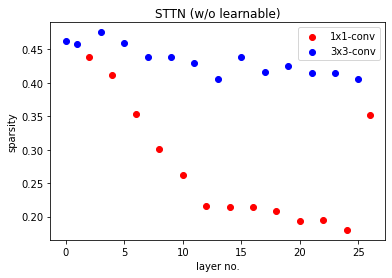

In [14]:
import matplotlib.pyplot as plt

ids_1 = [i for (i, _, k) in sparsity if k == 1]
vals_1 = [val for (_, val, k) in sparsity if k == 1]
plt.scatter(ids_1, vals_1, c="red", label="1x1-conv")

ids_3 = [i for (i, _, k) in sparsity if k == 3]
vals_3 = [val for (_, val, k) in sparsity if k == 3]
plt.scatter(ids_3, vals_3, c="blue", label="3x3-conv")

plt.title("STTN (w/o learnable)")
plt.xlabel("layer no.")
plt.ylabel("sparsity")
plt.legend()